In [53]:
import json
import requests
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.layers import Activation, Dense
from tensorflow.keras.metrics import Accuracy

In [54]:
r = requests.get("http://192.168.15.131:5000/api/v0.01/selfbalancing/mongodb/all")
if r.status_code == 200:
    register = json.loads(r.content)

In [55]:
df = pd.read_json(json.dumps(register))

In [56]:
df.head()

,gyroy,kalangley,kd,ki,kp,pitch,res
0,-145,-83.30,1,5,22,-83.20,200
1,-155,-83.30,1,5,22,-83.14,200
2,-146,-83.31,1,5,22,-83.48,200
3,-110,-83.31,1,5,22,-83.36,200
4,-99,-83.32,1,5,22,-83.54,200


In [57]:
# df.gyroy = df.gyroy.astype(float)
# df.kalangley = df.kalangley.astype(float)
# df.kd = df.kd.astype(float)
# df.ki = df.ki.astype(float)
# df.kp = df.kp.astype(float)
# df.pitch = df.pitch.astype(float)
# df.res = df.res.astype(float)

In [58]:
df.shape

(1575, 7)

In [59]:
df.head()

,gyroy,kalangley,kd,ki,kp,pitch,res
0,-145,-83.30,1,5,22,-83.20,200
1,-155,-83.30,1,5,22,-83.14,200
2,-146,-83.31,1,5,22,-83.48,200
3,-110,-83.31,1,5,22,-83.36,200
4,-99,-83.32,1,5,22,-83.54,200


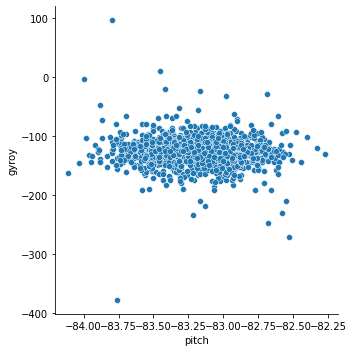

In [60]:
sns.relplot(x = "pitch", y = "gyroy", data = df)

In [61]:
for x in range(len(df)):
    if -150 < df["gyroy"][x] < -100:
        df.loc[x, "up"] = 1
    else:
        df.loc[x, "up"] = 0

In [62]:
df.sample(10)

,gyroy,kalangley,kd,ki,kp,pitch,res,up
684,-139,-83.19,1,5,22,-83.69,200,1.0
1442,-120,-83.11,1,5,22,-82.93,200,1.0
1133,-95,-83.19,1,5,22,-82.75,200,0.0
720,-129,-83.14,1,5,22,-83.27,200,1.0
1353,-146,-83.20,1,5,22,-83.32,200,1.0
1087,-146,-83.15,1,5,22,-83.07,200,1.0
958,-102,-83.18,1,5,22,-83.32,200,1.0
257,-126,-83.20,1,5,22,-82.85,200,1.0
343,-108,-83.11,1,5,22,-83.28,200,1.0
1475,-136,-83.22,1,5,22,-83.13,200,1.0


In [63]:
#df.to_csv("teste.csv", index=False)

In [64]:
features = df.iloc[:,0:7]
target = df.iloc[:,7]

In [65]:
target

0       1.0
1       0.0
2       1.0
3       1.0
4       0.0
       ... 
1570    1.0
1571    1.0
1572    1.0
1573    1.0
1574    1.0
Name: up, Length: 1575, dtype: float64

In [66]:
features

,gyroy,kalangley,kd,ki,kp,pitch,res
0,-145,-83.30,1,5,22,-83.20,200
1,-155,-83.30,1,5,22,-83.14,200
2,-146,-83.31,1,5,22,-83.48,200
3,-110,-83.31,1,5,22,-83.36,200
4,-99,-83.32,1,5,22,-83.54,200
...,...,...,...,...,...,...,...
1570,-113,-83.21,1,5,22,-83.55,200
1571,-143,-83.21,1,5,22,-83.00,200
1572,-110,-83.20,1,5,22,-83.12,200
1573,-142,-83.21,1,5,22,-83.32,200


In [67]:
X_train, X_test, y_train, y_test = train_test_split(target, features, test_size=0.33, random_state=8)

In [68]:
X_train.shape

(1055,)

In [69]:
#import tensorflow as tf

In [70]:
# modelo = Sequential([tf.keras.layers.Input(shape=(7,)),
#                     tf.keras.layers.Dense(1, activation='sigmoid')
# ])
modelo = Sequential()
modelo.add(Dense(12, input_dim=7, activation='relu'))
modelo.add(Dense(12, activation='relu'))
modelo.add(Dense(1, activation='sigmoid'))

In [71]:
#modelo.compile(loss='mse', optimizer='adam', metrics=['accuracy'])
modelo.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [72]:
historico = modelo.fit(y_train, X_train, epochs=100)

Epoch 1/100
33/33 [==============================] - 0s 444us/step - loss: 0.7861 - accuracy: 0.8009
Epoch 2/100
33/33 [==============================] - 0s 382us/step - loss: 0.6035 - accuracy: 0.8664
Epoch 3/100
33/33 [==============================] - 0s 383us/step - loss: 0.5599 - accuracy: 0.8673
Epoch 4/100
33/33 [==============================] - 0s 407us/step - loss: 0.5408 - accuracy: 0.8483
Epoch 5/100
33/33 [==============================] - 0s 407us/step - loss: 0.5245 - accuracy: 0.8379
Epoch 6/100
33/33 [==============================] - 0s 408us/step - loss: 0.5167 - accuracy: 0.8180
Epoch 7/100
33/33 [==============================] - 0s 394us/step - loss: 0.5158 - accuracy: 0.8171
Epoch 8/100
33/33 [==============================] - 0s 394us/step - loss: 0.5012 - accuracy: 0.8133
Epoch 9/100
33/33 [==============================] - 0s 405us/step - loss: 0.5142 - accuracy: 0.8218
Epoch 10/100
33/33 [==============================] - 0s 406us/step - loss: 0.4937 - accura

In [73]:
modelo.test_on_batch(y_train, X_train)
modelo.metrics_names

['loss', 'accuracy']

In [74]:
print(historico.history.keys())

dict_keys(['loss', 'accuracy'])


In [75]:
scores = modelo.evaluate(y_test, X_test)
print("\n")
print("Acuracia do modelo")
print("\n%s: %2f%%" % (modelo.metrics_names[1], scores[1]*100))

17/17 [==============================] - 0s 679us/step - loss: 0.0443 - accuracy: 0.9942


Acuracia do modelo

accuracy: 99.423075%


In [76]:
prediction = modelo.predict([[-74, -64, -51, -19, -11, 11, 23]])
print("prediction shape:", prediction)

prediction shape: [[1.4534877e-23]]


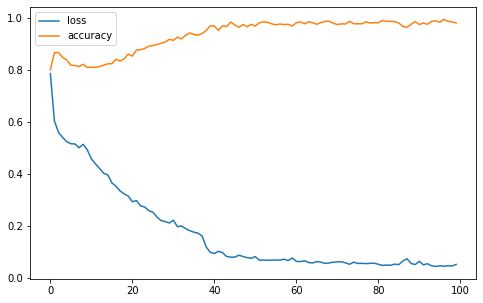

In [77]:
from matplotlib import pyplot as plt
pd.DataFrame(historico.history).plot(figsize=(8,5))
plt.show()

In [78]:
from random import sample
from random import randint

aux = 0
while (1):
  #sorteados = sample(range(-100, 100), 7)
  #print(sorteados)
  #sorteio = sample(range(-100, 100), 1)
  kd = randint(-100, 100)
  ki = randint(-100, 100)
  kp = randint(-100, 100)

  valor = [130, -83.18, kd, ki, kp, -83.3, 200]
  #print(valor)

  prediction = modelo.predict([valor])*100

  if prediction >= 0.8:
    print("tentativa: ", aux)
    print("numeros: ", valor)
    print("prediction shape:", prediction)
  aux += 1

tentativa:  167
numeros:  [130, -83.18, -63, -100, 100, -83.3, 200]
prediction shape: [[92.501854]]
tentativa:  593
numeros:  [130, -83.18, -99, -86, 92, -83.3, 200]
prediction shape: [[100.]]
tentativa:  825
numeros:  [130, -83.18, -82, -93, 84, -83.3, 200]
prediction shape: [[96.663795]]
tentativa:  848
numeros:  [130, -83.18, -85, -50, 97, -83.3, 200]
prediction shape: [[1.210615]]
tentativa:  895
numeros:  [130, -83.18, -80, -93, 99, -83.3, 200]
prediction shape: [[99.99884]]
tentativa:  1105
numeros:  [130, -83.18, -100, -80, 75, -83.3, 200]
prediction shape: [[98.28235]]
tentativa:  1547
numeros:  [130, -83.18, -63, -96, 93, -83.3, 200]
prediction shape: [[3.8547456]]
tentativa:  1565
numeros:  [130, -83.18, -87, -89, 88, -83.3, 200]
prediction shape: [[99.94628]]
tentativa:  1585
numeros:  [130, -83.18, -63, -100, 98, -83.3, 200]
prediction shape: [[79.061356]]
tentativa:  2313
numeros:  [130, -83.18, -96, -67, 93, -83.3, 200]
prediction shape: [[99.940094]]
tentativa:  2550
num

KeyboardInterrupt: 